In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
crypto_df = pd.read_csv("CryptocoinsHistoricalPrices.csv")

In [3]:
crypto_df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market.Cap', 'coin', 'Delta'],
      dtype='object')

In [4]:
crypto_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
0,1,2018-01-04,15270.7,15739.7,14522.2,15599.2,"21,783,200,000","256,250,000,000",BTC,0.021512
1,2,2018-01-03,14978.2,15572.8,14844.5,15201.0,"16,871,900,000","251,312,000,000",BTC,0.014875
2,3,2018-01-02,13625.0,15444.6,13163.6,14982.1,"16,846,600,000","228,579,000,000",BTC,0.099604
3,4,2018-01-01,14112.2,14112.2,13154.7,13657.2,"10,291,200,000","236,725,000,000",BTC,-0.032242
4,5,2017-12-31,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000",BTC,0.097591


In [5]:
#determine total number of altcoins
crypto_df["coin"].nunique()

1356

In [10]:
top15 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")|(crypto_df["coin"]=="DASH")|
                      (crypto_df["coin"]=="XEM")|(crypto_df["coin"]=="XMR")|
                      (crypto_df["coin"]=="BTG")|(crypto_df["coin"]=="ETC")|
                      (crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:]
top15.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
0,1,2018-01-04,15270.7,15739.7,14522.2,15599.2,"21,783,200,000","256,250,000,000",BTC,0.021512
1,2,2018-01-03,14978.2,15572.8,14844.5,15201.0,"16,871,900,000","251,312,000,000",BTC,0.014875
2,3,2018-01-02,13625.0,15444.6,13163.6,14982.1,"16,846,600,000","228,579,000,000",BTC,0.099604
3,4,2018-01-01,14112.2,14112.2,13154.7,13657.2,"10,291,200,000","236,725,000,000",BTC,-0.032242
4,5,2017-12-31,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000",BTC,0.097591


# Historical Volatility

In [7]:
#Formatting dataframe 
top15 = top15[["Date", "Close", "coin"]]
top15['Date'] = pd.to_datetime(top15['Date'])
mask = (top15['Date'] > '2016-12-31') & (top15['Date'] <= '2017-12-31')
top15 = top15.loc[mask]
top15 = top15.reset_index(drop=True)
top15.head()

/Users/sharonsu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close,coin
0,2017-12-31,14156.4,BTC
1,2017-12-30,12952.2,BTC
2,2017-12-29,14656.2,BTC
3,2017-12-28,14606.5,BTC
4,2017-12-27,15838.5,BTC


In [8]:
#Creating historical volatility dataframe
columns = ['Coin', 'Historical Volatility']
volatility_data = pd.DataFrame(columns = columns)

#Calculating volatility values & appending to dataframe
coins = top15.coin.unique()
for coin in coins:
    coin_dataframe = top15.loc[(top15['coin'] == coin)]
    coin_dataframe = coin_dataframe.reset_index(drop=True)
    coin_list = []
    for i, value in enumerate(coin_dataframe['Close'][:-1]):
        coin_list.append(value/coin_dataframe['Close'][i+1] -1)
    coin_stdv = np.std(coin_list)
    annualization_factor = np.sqrt(252)
    volatility_value = round(coin_stdv * annualization_factor, 2)
    volatility_data = volatility_data.append({'Coin': coin, 
                                              'Historical Volatility': volatility_value},
                                            ignore_index = True)
volatility_data

,Coin,Historical Volatility
0,BTC,0.79
1,XRP,2.28
2,ETH,1.16
3,ADA,3.43
4,XEM,2.07
5,LTC,1.38
6,XLM,2.20
7,MIOTA,1.90
8,DASH,1.29
9,NEO,2.23


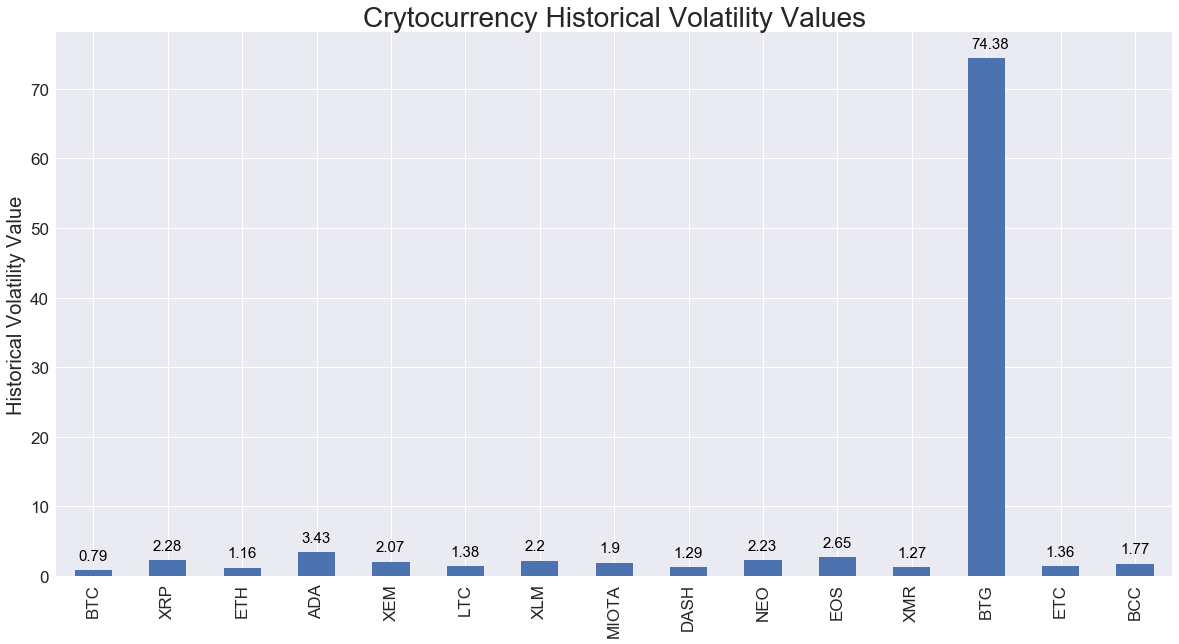

In [9]:
#Plotting data
plt.style.use('seaborn')
x = np.arange(15)
volatility_data.plot(kind = 'bar', x = 'Coin', y = 'Historical Volatility', 
                     legend = False, figsize = (20, 10))
plt.ylabel('Historical Volatility Value', fontsize = 20)
plt.xlabel('', fontsize = 20)
plt.title('Crytocurrency Historical Volatility Values', fontsize = 28)

plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
for a,b in zip(x, volatility_data['Historical Volatility']):
    b = round(b,2)
    plt.text(a-0.2, b + 1.5, str(b), color='black',fontsize = 15)
plt.show()